<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# type your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


#### Read the data

Load the csv file and print the first five observations.

In [2]:
# Assuming data is in a CSV file
df = pd.read_csv(r"H:\My Drive\MACHINE LEARNING+GL\ML+SLR+GL\DAY 3\Take Home Day 3 (1)\Take Home Day 3\Fish.csv")

In [3]:
df.head()

,Species,Weight,V_length,D_length,C_length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Our objective is to predict the weight of a fish.

**The data definition is as follows:** <br>

**Species:** Species of a fish

**Weight:** Weight of a fish (target/dependent variable)

**V_length:** Vertical length of a fish

**D_length:** Diagonal length of a fish

**C_length:** Cross length of a fish

**Height:** Height of a fish

**Width:** Diagonal width of a fish

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model on the scaled data and check whether the model is overfitting or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# type your code here
X = df[['V_length', 'D_length', 'C_length', 'Height', 'Width']]
y = df['Weight']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [8]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)


In [9]:
# For Training Data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# For Testing Data
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Training R-squared: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing R-squared: {test_r2}")


Training MSE: 14122.90243194372
Training R-squared: 0.8844187951803887
Testing MSE: 16636.932032767345
Testing R-squared: 0.8830356056835632


In [10]:
print(f"Training MSE: {train_mse:.4f}")
print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")


Training MSE: 14122.9024
Training R-squared: 0.8844
Testing MSE: 16636.9320
Testing R-squared: 0.8830


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present in the scaled data?
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

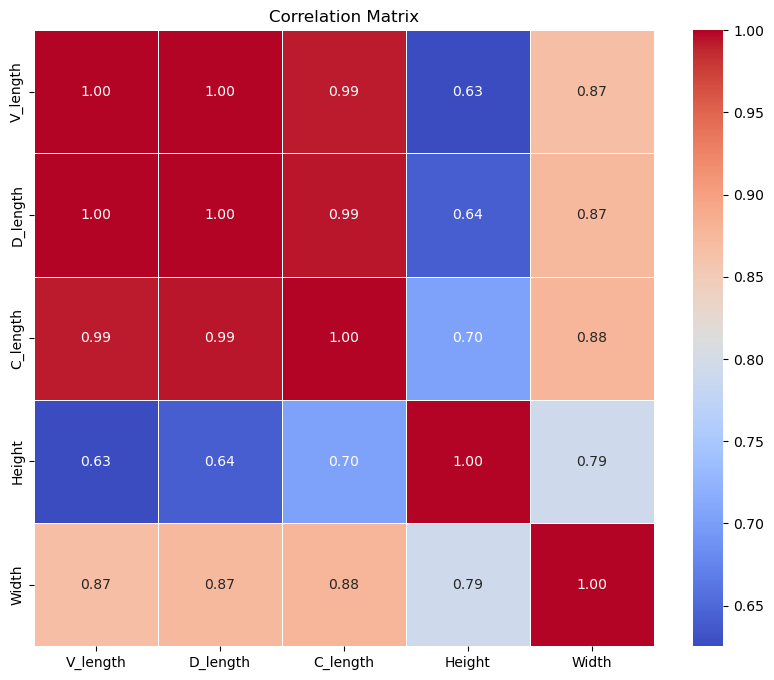

In [11]:
# type your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [12]:
import pandas as pd

# Compute the correlation matrix
correlation_matrix = X.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          V_length  D_length  C_length    Height     Width
V_length  1.000000  0.999517  0.992031  0.625378  0.867050
D_length  0.999517  1.000000  0.994103  0.640441  0.873547
C_length  0.992031  0.994103  1.000000  0.703409  0.878520
Height    0.625378  0.640441  0.703409  1.000000  0.792881
Width     0.867050  0.873547  0.878520  0.792881  1.000000


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Add a constant to the feature matrix
X_train_scaled = pd.DataFrame(X, columns=X.columns)  # Replace X_scaled with X if not scaled

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_scaled.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]

print(vif_data)


    Feature           VIF
0  V_length  12782.535830
1  D_length  16598.744318
2  C_length   3380.815907
3    Height     76.064364
4     Width     92.658672


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Apply the ridge regression with 'alpha = 1.5' and compare the RMSE on the test dataset with the RMSE obtained from linear regression using OLS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# type your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize and train the OLS Linear Regression model
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Predict on the test dataset
y_pred_ols = ols_model.predict(X_test)

# Compute RMSE for OLS
mse_ols = mean_squared_error(y_test, y_pred_ols)
rmse_ols = np.sqrt(mse_ols)

print(f"OLS Regression RMSE: {rmse_ols:.4f}")


OLS Regression RMSE: 128.9842


In [15]:
from sklearn.linear_model import Ridge

# Initialize and train the Ridge Regression model
ridge_model = Ridge(alpha=1.5)
ridge_model.fit(X_train, y_train)

# Predict on the test dataset
y_pred_ridge = ridge_model.predict(X_test)

# Compute RMSE for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print(f"Ridge Regression RMSE (alpha=1.5): {rmse_ridge:.4f}")


Ridge Regression RMSE (alpha=1.5): 129.3126


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a full model using SGD. Plot a multiple barchart to compare the beta coefficients for each variable obtained by the SGD model and the full model build using OLS 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training data
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train OLS model
ols_model = LinearRegression()
ols_model.fit(X_train_scaled, y_train)

# Train SGD model
sgd_model = SGDRegressor()
sgd_model.fit(X_train_scaled, y_train)

# Extract coefficients
coefficients_ols = ols_model.coef_
coefficients_sgd = sgd_model.coef_

# Create DataFrame for plotting
feature_names = X.columns
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'OLS Coefficients': coefficients_ols,
    'SGD Coefficients': coefficients_sgd
})

print(coefficients_df)


    Feature  OLS Coefficients  SGD Coefficients
0  V_length        459.312706         82.325451
1  D_length         43.674782         81.080834
2  C_length       -277.413035         72.042786
3    Height         91.152672         34.851659
4     Width         45.446266         75.757064


    Feature  OLS Coefficients  SGD Coefficients
0  V_length        459.312706         81.769134
1  D_length         43.674782         80.684036
2  C_length       -277.413035         72.926712
3    Height         91.152672         35.470697
4     Width         45.446266         73.386113


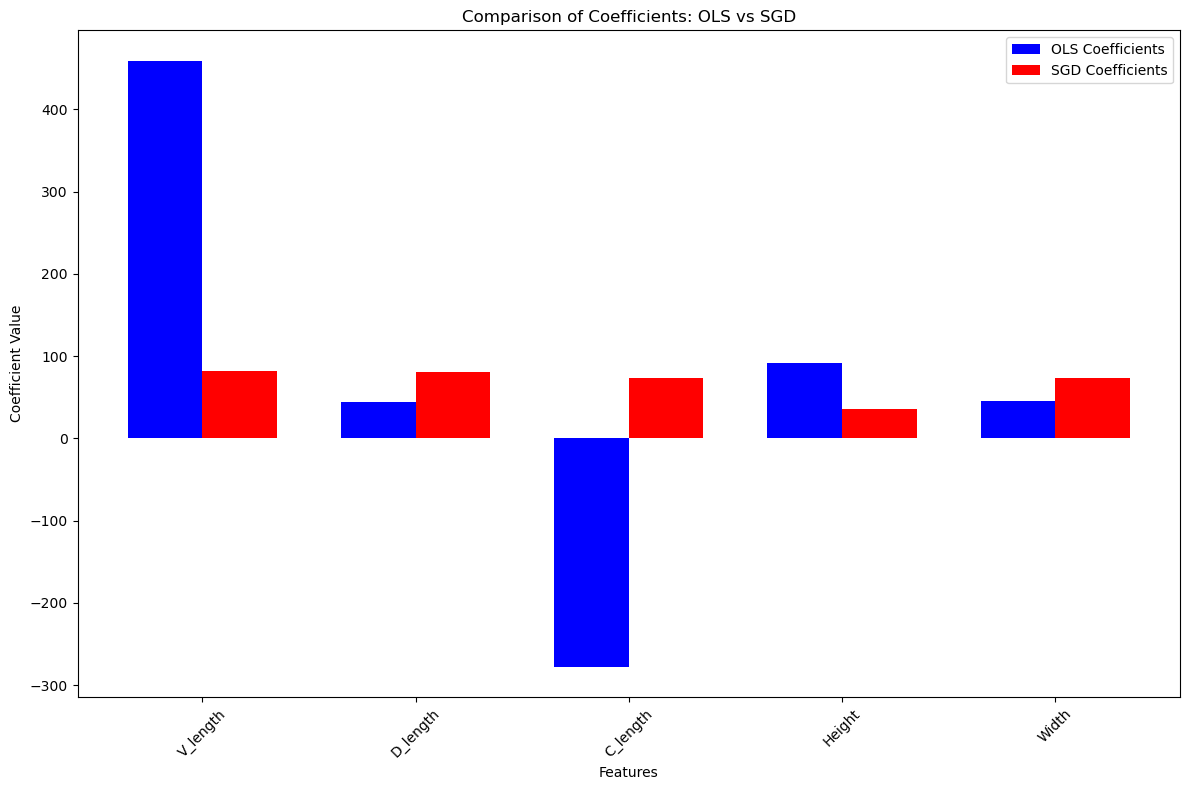

In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have your data in X_train, y_train, X_test, and y_test

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train OLS model
ols_model = LinearRegression()
ols_model.fit(X_train_scaled, y_train)
coefficients_ols = ols_model.coef_

# Train SGD model
sgd_model = SGDRegressor()
sgd_model.fit(X_train_scaled, y_train)
coefficients_sgd = sgd_model.coef_

# Create DataFrame for plotting
feature_names = X.columns
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'OLS Coefficients': coefficients_ols,
    'SGD Coefficients': coefficients_sgd
})

print(coefficients_df)

# Plotting the coefficients
x = np.arange(len(feature_names))  # The label locations
width = 0.35  # The width of the bars

plt.figure(figsize=(12, 8))

# Plot OLS coefficients
plt.bar(x - width/2, coefficients_df['OLS Coefficients'], width, label='OLS Coefficients', color='blue')

# Plot SGD coefficients
plt.bar(x + width/2, coefficients_df['SGD Coefficients'], width, label='SGD Coefficients', color='red')

plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients: OLS vs SGD')
plt.xticks(x, feature_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the least significant variables in the data by considering 'alpha = 0.1' 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# type your code here
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Assuming you have your data in X_train and y_train

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge Regression model with alpha = 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)

# Extract coefficients
coefficients_ridge = ridge_model.coef_

# Create DataFrame for coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Ridge Coefficients': coefficients_ridge
})

print(coefficients_df)


    Feature  Ridge Coefficients
0  V_length          269.913540
1  D_length          141.173198
2  C_length         -183.206081
3    Height           72.464249
4     Width           56.536950


In [ ]:
# Sort coefficients by absolute value
coefficients_df['Absolute Coefficients'] = coefficients_df['Ridge Coefficients'].abs()
coefficients_df_sorted = coefficients_df.sort_values(by='Absolute Coefficients', ascending=True)

print(coefficients_df_sorted)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of diagonal width on the weight of a fish?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
print(X_train.columns)


Index(['V_length', 'D_length', 'C_length', 'Height', 'Width'], dtype='object')


In [21]:
print(X_train.head())


     V_length  D_length  C_length   Height   Width
75       15.0      16.2      17.2   4.5924  2.6316
138      43.2      46.0      48.7   7.7920  4.8700
2        23.9      26.5      31.1  12.3778  4.6961
86       20.0      22.0      23.5   6.1100  3.4075
45       20.5      22.5      25.3   7.0334  3.8203


    Feature  Ridge Coefficients
0  V_length          269.913540
1  D_length          141.173198
2  C_length         -183.206081
3    Height           72.464249
4     Width           56.536950
Coefficient for Diagonal Width (Width): 56.536950189703205


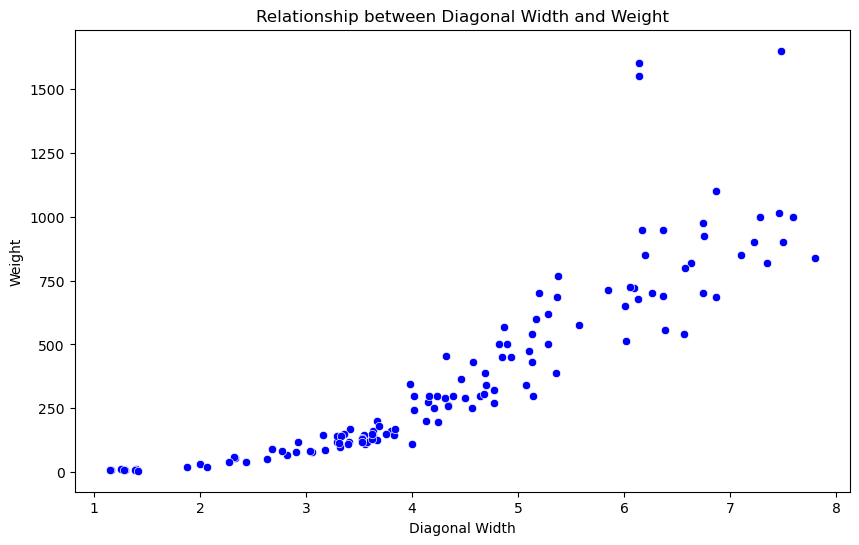

In [22]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data in X_train and y_train

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge Regression model with alpha = 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)

# Extract coefficients
coefficients_ridge = ridge_model.coef_
coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ridge Coefficients': coefficients_ridge
})

# Print coefficients
print(coefficients_df)

# Specifically print the coefficient for 'Width'
print("Coefficient for Diagonal Width (Width):", coefficients_df.loc[coefficients_df['Feature'] == 'Width', 'Ridge Coefficients'].values[0])

# Plotting the relationship between Diagonal Width and Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['Width'], y=y_train, color='blue')
plt.xlabel('Diagonal Width')
plt.ylabel('Weight')
plt.title('Relationship between Diagonal Width and Weight')
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Which value of alpha from the list of values returns lowest RMSE on the test set in ridge regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.00001, 0.001, 0.1, 10, 100]
    
Consider 5-fold cross validation.

In [24]:
# type your code here
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import pandas as pd


In [25]:
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))


In [26]:
list_of_alpha = [0.00001, 0.001, 0.1, 10, 100]

# Dictionary to store RMSE for each alpha
alpha_rmse = {}

for alpha in list_of_alpha:
    # Create Ridge regression model with current alpha
    model = Ridge(alpha=alpha)
    
    # Perform cross-validation
    cv_rmse = cross_val_score(model, X_train, y_train, cv=5, scoring=rmse_scorer)
    
    # Store the mean RMSE
    alpha_rmse[alpha] = cv_rmse.mean()

# Convert dictionary to DataFrame for better readability
alpha_rmse_df = pd.DataFrame(list(alpha_rmse.items()), columns=['Alpha', 'Mean RMSE'])
print(alpha_rmse_df)

# Determine the alpha with the lowest RMSE
best_alpha = min(alpha_rmse, key=alpha_rmse.get)
print(f'Best alpha: {best_alpha} with Mean RMSE: {alpha_rmse[best_alpha]}')


       Alpha   Mean RMSE
0    0.00001  127.327074
1    0.00100  127.325995
2    0.10000  127.222066
3   10.00000  124.795558
4  100.00000  124.956252
Best alpha: 10 with Mean RMSE: 124.7955576689086


In [27]:
# Train Ridge model with the best alpha
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate and print RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE for alpha {best_alpha}: {test_rmse}')


Test RMSE for alpha 10: 130.0373423465531


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Select the best value for the elastic net mixing parameter from the list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the below list of values:

    list_of_parameter = [0.0001, 0.001, 0.01, 0.1, 1]

Consider 5-fold cross validation.

In [28]:
# type your code here
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import pandas as pd


In [29]:
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))


In [30]:
list_of_parameter = [0.0001, 0.001, 0.01, 0.1, 1]

# Dictionary to store RMSE for each l1_ratio
parameter_rmse = {}

for l1_ratio in list_of_parameter:
    # Create ElasticNet model with current l1_ratio
    model = ElasticNet(l1_ratio=l1_ratio)
    
    # Perform cross-validation
    cv_rmse = cross_val_score(model, X_train, y_train, cv=5, scoring=rmse_scorer)
    
    # Store the mean RMSE
    parameter_rmse[l1_ratio] = cv_rmse.mean()

# Convert dictionary to DataFrame for better readability
parameter_rmse_df = pd.DataFrame(list(parameter_rmse.items()), columns=['l1_ratio', 'Mean RMSE'])
print(parameter_rmse_df)

# Determine the l1_ratio with the lowest RMSE
best_l1_ratio = min(parameter_rmse, key=parameter_rmse.get)
print(f'Best l1_ratio: {best_l1_ratio} with Mean RMSE: {parameter_rmse[best_l1_ratio]}')


   l1_ratio   Mean RMSE
0    0.0001  124.971044
1    0.0010  124.970068
2    0.0100  124.960288
3    0.1000  124.860387
4    1.0000  125.730336
Best l1_ratio: 0.1 with Mean RMSE: 124.86038720337959


In [31]:
# Train ElasticNet model with the best l1_ratio
best_model = ElasticNet(l1_ratio=best_l1_ratio)
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate and print RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE for l1_ratio {best_l1_ratio}: {test_rmse}')


Test RMSE for l1_ratio 0.1: 132.3198971302201


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the best value of alpha from the list of values for lasso regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.0001, 0.001, 0.1, 1, 2, 3]
    
Consider 5-fold cross validation.

In [32]:
# type your code here
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import pandas as pd


In [33]:
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))


In [34]:
list_of_alpha = [0.0001, 0.001, 0.1, 1, 2, 3]

# Dictionary to store RMSE for each alpha
alpha_rmse = {}

for alpha in list_of_alpha:
    # Create Lasso model with current alpha
    model = Lasso(alpha=alpha)
    
    # Perform cross-validation
    cv_rmse = cross_val_score(model, X_train, y_train, cv=5, scoring=rmse_scorer)
    
    # Store the mean RMSE
    alpha_rmse[alpha] = cv_rmse.mean()

# Convert dictionary to DataFrame for better readability
alpha_rmse_df = pd.DataFrame(list(alpha_rmse.items()), columns=['Alpha', 'Mean RMSE'])
print(alpha_rmse_df)

# Determine the alpha with the lowest RMSE
best_alpha = min(alpha_rmse, key=alpha_rmse.get)
print(f'Best alpha: {best_alpha} with Mean RMSE: {alpha_rmse[best_alpha]}')


    Alpha   Mean RMSE
0  0.0001  125.995823
1  0.0010  125.995416
2  0.1000  125.951224
3  1.0000  125.730336
4  2.0000  125.710233
5  3.0000  125.704202
Best alpha: 3 with Mean RMSE: 125.70420179776279


In [35]:
# Train Lasso model with the best alpha
best_model = Lasso(alpha=best_alpha)
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate and print RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE for alpha {best_alpha}: {test_rmse}')


Test RMSE for alpha 3: 130.2594018374927


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build the elastic net regression model with 'alpha = 0.1' and best l1_ratio obtained by the GridSearchCV method. Also, compute the RMSE for test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# type your code here
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np


In [37]:
# Define the grid of parameters
param_grid = {
    'l1_ratio': [0.0001, 0.001, 0.01, 0.1, 1]
}

# Create ElasticNet model with alpha = 0.1
elastic_net = ElasticNet(alpha=0.1)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best l1_ratio
best_l1_ratio = grid_search.best_params_['l1_ratio']
print(f'Best l1_ratio: {best_l1_ratio}')


Best l1_ratio: 0.0001


In [38]:
# Build the final ElasticNet model with the best l1_ratio
best_model = ElasticNet(alpha=0.1, l1_ratio=best_l1_ratio)
best_model.fit(X_train, y_train)


ElasticNet(alpha=0.1, l1_ratio=0.0001)

In [39]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Compute RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE for ElasticNet model with alpha=0.1 and l1_ratio={best_l1_ratio}: {test_rmse}')


Test RMSE for ElasticNet model with alpha=0.1 and l1_ratio=0.0001: 130.00615715125346
